In [792]:
import numpy as np
import pandas as pd
import requests # to make TMDB API calls
import locale # to format currency as USD
locale.setlocale( locale.LC_ALL, '' )
api_key = '07c743da178e65cad9e43897e89fc202'
import ast
import statistics
import matplotlib.pyplot as plt

In [793]:
fixDates = pd.read_csv('dsfinal/testDates.csv', sep=',', usecols=['release_date'], squeeze=True)

In [794]:
train = pd.read_csv('dsfinal/train.csv')
test = pd.read_csv('dsfinal/test.csv')
test['release_date'] = fixDates

In [795]:
#get revenue for test data so the dict for crew/actor movies can be created
def getRev(row):
    response = requests.get('https://api.themoviedb.org/3/find/'+ row.imdb_id + '?api_key=' + api_key +'&language=en-US&external_source=imdb_id')
    if 'movie_results' in response.json().keys():
        if len(response.json()['movie_results']) >= 1:
            tmdbid = response.json()['movie_results'][0]['id']
        else:
            return 0
    else:
        return 0
    response = requests.get('https://api.themoviedb.org/3/movie/' + str(tmdbid) + '?api_key=' +  api_key + '&language=en-US')
    if 'revenue' in response.json().keys():
        return response.json()['revenue']
    else: 
        return 0

In [796]:
#commented out below line to make sure it doesnt get accidentally run (long run time)
#revenues = test.apply(lambda row: getRev(row), axis = 1)
test['revenue'] = revenues

frames = [train, test]
combined = pd.concat(frames, sort = False)

In [797]:
trainpre = train
trainpre = trainpre.drop(["homepage", "overview", "tagline", "status", "poster_path"], axis=1)
combined = combined.drop(["homepage", "overview", "tagline", "status", "poster_path"], axis=1)
test = test.drop(["homepage", "overview", "tagline", "status", "poster_path"], axis=1)


In [798]:
trainpre['belongs_to_collection'] = trainpre['belongs_to_collection'].fillna(0)
trainpre.loc[trainpre.belongs_to_collection != '', 'has_collection'] = '1'
trainpre.loc[trainpre.belongs_to_collection == 0, 'has_collection'] = '0'
#trainpre['collection'] = trainpre.apply(lambda row: ast.literal_eval(row.belongs_to_collection) if type(row.belongs_to_collection) == str else 0, axis = 1)
#trainpre['collection_name'] = trainpre.apply(lambda row: row.collection[0]['name'] if type(row.collection) == list else 0, axis = 1)
trainpre['cast'] = trainpre.apply(lambda row: ast.literal_eval(row.cast) if type(row.cast) == str else 0, axis = 1)
trainpre['crew'] = trainpre.apply(lambda row: ast.literal_eval(row.crew) if type(row.crew) == str else 0, axis = 1)
trainpre['production_companies'] = trainpre.apply(lambda row: ast.literal_eval(row.production_companies) if type(row.production_companies) == str else 0, axis = 1)



In [799]:
test['belongs_to_collection'] = test['belongs_to_collection'].fillna(0)
test.loc[test.belongs_to_collection != '', 'has_collection'] = '1'
test.loc[test.belongs_to_collection == 0, 'has_collection'] = '0'
#test['collection'] = test.apply(lambda row: ast.literal_eval(row.belongs_to_collection) if type(row.belongs_to_collection) == str else 0, axis = 1)
#test['collection_name'] = test.apply(lambda row: row.collection[0]['name'] if type(row.collection) == list else 0, axis = 1)
test['cast'] = test.apply(lambda row: ast.literal_eval(row.cast) if type(row.cast) == str else 0, axis = 1)
test['crew'] = test.apply(lambda row: ast.literal_eval(row.crew) if type(row.crew) == str else 0, axis = 1)
test['production_companies'] = test.apply(lambda row: ast.literal_eval(row.production_companies) if type(row.production_companies) == str else 0, axis = 1)


In [800]:
combined['belongs_to_collection'] = combined['belongs_to_collection'].fillna(0)
combined.loc[combined.belongs_to_collection != '', 'has_collection'] = '1'
combined.loc[combined.belongs_to_collection == 0, 'has_collection'] = '0'
#combined['collection'] = combined.apply(lambda row: ast.literal_eval(row.belongs_to_collection) if type(row.belongs_to_collection) == str else 0, axis = 1)
#combined['collection_name'] = combined.apply(lambda row: row.collection[0]['name'] if type(row.collection) == list else 0, axis = 1)
combined['cast'] = combined.apply(lambda row: ast.literal_eval(row.cast) if type(row.cast) == str else 0, axis = 1)
combined['crew'] = combined.apply(lambda row: ast.literal_eval(row.crew) if type(row.crew) == str else 0, axis = 1)
combined['production_companies'] = combined.apply(lambda row: ast.literal_eval(row.production_companies) if type(row.production_companies) == str else 0, axis = 1)
combined

,id,belongs_to_collection,budget,genres,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,title,Keywords,cast,crew,revenue,has_collection
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/2015,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/2004,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1
2,3,0,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/2014,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0
3,4,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,3.174936,0,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/2012,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0
4,5,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,1.148070,0,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/2009,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,7394,0,42000000,"[{'id': 53, 'name': 'Thriller'}]",tt0218922,en,Original Sin,9.970359,"[{'name': 'Intermedia Films', 'id': 763}, {'na...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",8/20/2004,118.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Original Sin,"[{'id': 515, 'name': 'women'}, {'id': 572, 'na...","[{'cast_id': 17, 'character': 'Julia Russell/B...","[{'credit_id': '52fe4330c3a36847f80412db', 'de...",35402320,0
4394,7395,"[{'id': 146534, 'name': 'Without a Paddle Coll...",19000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0364751,en,Without a Paddle,6.046516,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/8/1982,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Without a Paddle,"[{'id': 4959, 'name': 'death of a friend'}, {'...","[{'cast_id': 40, 'character': 'Dan Mott', 'cre...","[{'credit_id': '52fe43b29251416c7501a909', 'de...",69631118,1
4395,7396,0,16000000,"[{'id': 18, 'name': 'Drama'}]",tt0084855,en,The Verdict,9.596883,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/4/2015,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Verdict,"[{'id': 1680, 'name': 'boston'}, {'id': 6148, ...","[{'cast_id': 1, 'character': 'Frank Galvin', '...","[{'credit_id': '52fe448bc3a368484e028c55', 'de...",53977250,0
4396,7397,0,2000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",tt3235888,en,It Follows,20.359336,"[{'name': 'Northern Lights Films', 'id': 8714}...","[

In [801]:
trainpre['log_revenue'] = np.log1p(trainpre['revenue'])
test['log_revenue'] = np.log1p(test['revenue'])
trainpre['release_year'] = trainpre.apply(lambda row: int(row.release_date[-4:]) if row.release_date != 'nan' and type(row.release_date) == str else 0, axis = 1)
test['release_year'] = test.apply(lambda row: int(row.release_date[-4:]) if row.release_date != 'nan' and type(row.release_date) == str else 0, axis = 1)


In [802]:
def getMissingCast(row):
    if type(row.cast) == list:
        return row.cast
    else:
        response = requests.get('https://api.themoviedb.org/3/find/'+ row.imdb_id + '?api_key=' + api_key +'&language=en-US&external_source=imdb_id')
        if 'movie_results' in response.json().keys():  
            if len(response.json()['movie_results']) == 1:
                tmdbid = response.json()['movie_results'][0]['id']
                responseTwo = requests.get('https://api.themoviedb.org/3/movie/' + str(tmdbid) + '/credits?api_key=' +  api_key + '&language=en-US')
                print("Searched TMDB for (cast) " + row.title) 
                return responseTwo.json()['cast']
            else:
                return {}
        else:
            print("find fail on " + row.title + " id: " + str(row.id))
            return {}
        
def getMissingCrew(row):
    if type(row.crew) == list:
        return row.crew
    else:
        response = requests.get('https://api.themoviedb.org/3/find/'+ row.imdb_id + '?api_key=' + api_key +'&language=en-US&external_source=imdb_id')
        if 'movie_results' in response.json().keys():  
            if len(response.json()['movie_results']) == 1:
                tmdbid = response.json()['movie_results'][0]['id']
                responseTwo = requests.get('https://api.themoviedb.org/3/movie/' + str(tmdbid) + '/credits?api_key=' +  api_key + '&language=en-US')
                print("Searched TMDB for " + row.title) 
                return responseTwo.json()['crew']
            else:
                return {}
        else:
            print("find fail on " + row.title + " id: " + str(row.id))
            return {}
    

def actorReturn(row):
    if type(row.cast) == list:
        if len(row.cast) >= 2:
            actors = {
                "actor1": row.cast[0]['id'],
                "actor2": row.cast[1]['id']
            }
            return actors
        elif len(row.cast) == 1:
            actors = {
                "actor1": row.cast[0]['id'],
            }
            return actors
        else:
                    return {}
    else:
        return {}
    
def returnCrew(crew):
    crewDict = {
        'Director': None,
        'Producer': None
    }
    direc = 0
    prod = 0
    for x in crew:
        #print(crewDict)
        if x['job'] == 'Director':
            crewDict['Director'] = x['id']
            direc = 1
        elif x['job'] == 'Producer':
            crewDict['Producer'] = x['id']
            prod = 1
        if direc > 0 and prod > 0:
            return crewDict
    return crewDict

In [847]:
#response = requests.get('https://api.themoviedb.org/3/find/'+ 'tt2364975' + '?api_key=' + api_key +'&language=en-US&external_source=imdb_id')
#tmdbid = response.json()['movie_results'][0]['id']
#responseTwo = requests.get('https://api.themoviedb.org/3/movie/' + str(tmdbid) + '?api_key=' +  api_key + '&language=en-US')
#responseTwo.json()
#response.json()['movie_results'][0]['id']

{'adult': False,
 'backdrop_path': '/36yakWYCfyxldWkeazbVOedqUv7.jpg',
 'belongs_to_collection': None,
 'budget': 0,
 'genres': [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'name': 'Music'}],
 'homepage': None,
 'id': 191294,
 'imdb_id': 'tt2364975',
 'original_language': 'sv',
 'original_title': 'Vi är bäst!',
 'overview': 'Three girls in 1980s Stockholm decide to form a punk band -- despite not having any instruments and being told by everyone that punk is dead.',
 'popularity': 3.539,
 'poster_path': '/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg',
 'production_companies': [{'id': 321,
   'logo_path': '/pfp6VWF3tYfOHHVRHpYe2iGcYrf.png',
   'name': 'Memfis Film',
   'origin_country': 'SE'},
  {'id': 2801,
   'logo_path': '/bswb1PLLsKDUXMLgy42bZtCtIde.png',
   'name': 'Film i Väst',
   'origin_country': 'SE'}],
 'production_countries': [{'iso_3166_1': 'DK', 'name': 'Denmark'},
  {'iso_3166_1': 'SE', 'name': 'Sweden'}],
 'release_date': '2013-03-28',
 'revenue': 180590,
 'runtime': 102,
 'spoken_lan

In [804]:
trainpre['cast'] = trainpre.apply(lambda row: getMissingCast(row), axis =1) 
trainpre['crew'] = trainpre.apply(lambda row: getMissingCrew(row), axis =1) 


combined['cast'] = combined.apply(lambda row: getMissingCast(row), axis =1) 
combined['crew'] = combined.apply(lambda row: getMissingCrew(row), axis =1) 


test['cast'] = test.apply(lambda row: getMissingCast(row), axis =1) 
test['crew'] = test.apply(lambda row: getMissingCrew(row), axis =1) 


Searched TMDB for (cast) Wonder Woman
Searched TMDB for (cast) The Day After Tomorrow
Searched TMDB for (cast) The Dark Knight Rises
Searched TMDB for (cast) John Wick: Chapter 2
Searched TMDB for (cast) Mr. Smith Goes to Washington
Searched TMDB for (cast) The Assassination of Richard Nixon
Searched TMDB for (cast) Logan
Searched TMDB for (cast) The Wolf of Wall Street
Searched TMDB for (cast) 15 Minutes
Searched TMDB for (cast) You Don't Mess with the Zohan
Searched TMDB for (cast) Valerian and the City of a Thousand Planets
Searched TMDB for (cast) The X Files: I Want to Believe
Searched TMDB for (cast) Les Misérables
Searched TMDB for The Book of Mormon Movie, Volume 1: The Journey
Searched TMDB for Wonder Woman
Searched TMDB for The Day After Tomorrow
Searched TMDB for The Dark Knight Rises
Searched TMDB for John Wick: Chapter 2
Searched TMDB for Mr. Smith Goes to Washington
Searched TMDB for The Assassination of Richard Nixon
Searched TMDB for Logan
Searched TMDB for The Wolf of 

In [805]:
trainpre['rel_actors'] = trainpre.apply(lambda row: actorReturn(row), axis =1) 
trainpre['rel_crew'] = trainpre.apply(lambda row: returnCrew(row.crew) if type(row.crew) == list else {},  axis =1)
combined['rel_actors'] = combined.apply(lambda row: actorReturn(row), axis =1) 
combined['rel_crew'] = combined.apply(lambda row: returnCrew(row.crew) if type(row.crew) == list else {},  axis =1)
test['rel_actors'] = test.apply(lambda row: actorReturn(row), axis =1) 
test['rel_crew'] = test.apply(lambda row: returnCrew(row.crew) if type(row.crew) == list else {},  axis =1)

In [806]:
workerPerformance = pd.DataFrame(columns=['revenue', 'Director', 'date', 'Producer', 'actor1','actor2'])
workerPerformance['revenue'] = combined.apply(lambda row: row.revenue if 'Director' in row.rel_crew.keys() else  None, axis =1) 
workerPerformance['Director'] = combined.apply(lambda row: row.rel_crew['Director'] if 'Director' in row.rel_crew.keys() else  None, axis =1) 
workerPerformance['date'] = combined.apply(lambda row: str(row.release_date)[-4:] if 'Director' in row.rel_crew.keys() else  None, axis =1) 
workerPerformance['Producer'] = combined.apply(lambda row: row.rel_crew['Producer'] if 'Producer' in row.rel_crew.keys() else  None, axis =1) 
workerPerformance['actor1'] = combined.apply(lambda row: row.rel_actors['actor1'] if 'actor1' in row.rel_actors.keys() else  None, axis =1) 
workerPerformance['actor2'] = combined.apply(lambda row: row.rel_actors['actor2'] if 'actor2' in row.rel_actors.keys() else  None, axis =1) 

frame = { 'Director': workerPerformance['Director'],
         'Producer': workerPerformance['Producer'],
         'actor1': workerPerformance['actor1'],
         'actor2': workerPerformance['actor2'],
         'revenue': workerPerformance['revenue'],
         'date': workerPerformance['date'] } 

workerResults = pd.DataFrame(frame) 

In [807]:
def getSuccess(id, relDict, date):
    relevantList = []
    if id == None:
        return 0
    if id not in relDict.keys():
        print("error: " + str(id))
        return 0
    for movie in relDict[id]:
        if int(movie[0]) < date:
            relevantList.append(movie[1])
        else:
            break
    if len(relevantList) == 0:
        return 0
    return statistics.mean(relevantList)

#weight recent movies and 
#def weightedSuc(movieList):
#    movi
    
#return metric of sucess based on 

directorsAndMovies = {}
def directorLists(row):
    if row.Director == None:
        return 0
    if row.date == 'nan':
        return 0
    if row.date == None:
        return 0
    if row.Director in directorsAndMovies.keys(): 
        directorsAndMovies[row.Director].append([int(row.date), row.revenue])
    else:
        directorsAndMovies[row.Director] = [[int(row.date), row.revenue]]
    return 1
        
meme = workerResults.apply(lambda row: directorLists(row), axis = 1)

producersAndMovies = {}
def producersLists(row):
    if row.Producer == None:
        return 0
    if row.date == 'nan':
        return 0
    if row.date == None:
        return 0
    if row.Producer in producersAndMovies.keys(): 
        producersAndMovies[row.Producer].append([int(row.date), row.revenue])
    else:
        producersAndMovies[row.Producer] = [[int(row.date), row.revenue]]
    return 1
        
meme = workerResults.apply(lambda row: producersLists(row), axis = 1)

actorsAndMovies = {}
def actorsLists(row):
    boolOnlyOne = 0
    if row.actor2 == None and row.actor1 == None:
        return 0
    elif row.actor2 == None:
        boolOnlyOne = 1
    if row.date == 'nan':
        return 0
    if row.date == None:
        return 0
    if row.actor1 in actorsAndMovies.keys(): 
        actorsAndMovies[row.actor1].append([int(row.date), row.revenue])
    else:
        actorsAndMovies[row.actor1] = [[int(row.date), row.revenue]]
    if boolOnlyOne != 1:
        if row.actor2 in actorsAndMovies.keys(): 
            actorsAndMovies[row.actor2].append([int(row.date), row.revenue])
        else:
            actorsAndMovies[row.actor2] = [[int(row.date), row.revenue]]
    return 1
        
meme = workerResults.apply(lambda row: actorsLists(row), axis = 1)


def Sort(sub_li): 
  
    # reverse = None (Sorts in Ascending order) 
    # key is set to sort using second element of  
    # sublist lambda has been used 
    return(sorted(sub_li, key = lambda x: x[0]))   

for key in directorsAndMovies:
    directorsAndMovies[key] = Sort(directorsAndMovies[key])
    
for key in producersAndMovies:
    producersAndMovies[key] = Sort(producersAndMovies[key])
    
for key in actorsAndMovies:
    actorsAndMovies[key] = Sort(actorsAndMovies[key])
    
    

In [808]:
#combined['directorSuccess'] = combined.apply(lambda row: getSuccess(row.rel_crew['Director'], directorsAndMovies, int(row.release_date[-4:])) if row.release_date != 'nan' and 'Director' in row.rel_crew.keys() and type(row.release_date) == str else 0, axis = 1)
trainpre['director_success'] = trainpre.apply(lambda row: getSuccess(row.rel_crew['Director'], directorsAndMovies, int(row.release_date[-4:])) if row.release_date != 'nan' and 'Director' in row.rel_crew.keys() and type(row.release_date) == str else 0, axis = 1)
test['director_success'] = test.apply(lambda row: getSuccess(row.rel_crew['Director'], directorsAndMovies, int(row.release_date[-4:])) if row.release_date != 'nan' and 'Director' in row.rel_crew.keys() and type(row.release_date) == str else 0, axis = 1)

trainpre['producer_success'] = trainpre.apply(lambda row: getSuccess(row.rel_crew['Producer'], producersAndMovies, int(row.release_date[-4:])) if row.release_date != 'nan' and 'Producer' in row.rel_crew.keys() and type(row.release_date) == str else 0, axis = 1)
test['producer_success'] = test.apply(lambda row: getSuccess(row.rel_crew['Producer'], producersAndMovies, int(row.release_date[-4:])) if row.release_date != 'nan' and 'Producer' in row.rel_crew.keys() and type(row.release_date) == str else 0, axis = 1)

trainpre['actor1_success'] = trainpre.apply(lambda row: getSuccess(row.rel_actors['actor1'], actorsAndMovies, int(row.release_date[-4:])) if row.release_date != 'nan' and 'actor1' in row.rel_actors.keys() and type(row.release_date) == str else 0, axis = 1)
test['actor1_success'] = test.apply(lambda row: getSuccess(row.rel_actors['actor1'], actorsAndMovies, int(row.release_date[-4:])) if row.release_date != 'nan' and 'actor1' in row.rel_actors.keys() and type(row.release_date) == str else 0, axis = 1)

trainpre['actor2_success'] = trainpre.apply(lambda row: getSuccess(row.rel_actors['actor2'], actorsAndMovies, int(row.release_date[-4:])) if row.release_date != 'nan' and 'actor2' in row.rel_actors.keys() and type(row.release_date) == str else 0, axis = 1)
test['actor2_success'] = test.apply(lambda row: getSuccess(row.rel_actors['actor2'], actorsAndMovies, int(row.release_date[-4:])) if row.release_date != 'nan' and 'actor2' in row.rel_actors.keys() and type(row.release_date) == str else 0, axis = 1)


error: 45275
error: 1687041
error: 36691
error: 1765227
error: 234479


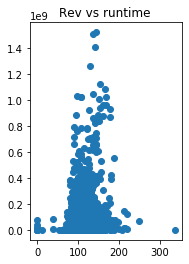

In [809]:
plt.subplot(1, 2, 2)

plt.scatter(trainpre['runtime'], trainpre['revenue'])
plt.title('Rev vs runtime ');

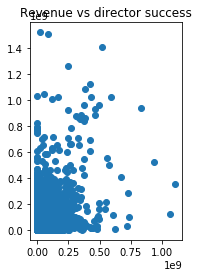

In [810]:

#plt.subplot(1, 2, 1)
#plt.scatter(combined['directorSucess'], combined['log_revenue'])
#plt.title('Log Revenue vs director success');
plt.subplot(1, 2, 2)
plt.scatter(trainpre['director_success'], trainpre['revenue'])
plt.title('Revenue vs director success');

In [811]:
test = test.drop(["original_title", "title", "original_language", "production_countries", "production_companies", "spoken_languages", "belongs_to_collection", "rel_actors", "rel_crew", "Keywords", "cast", "crew"], axis=1)
trainpre = trainpre.drop(["original_title", "title", "original_language", "production_countries", "production_companies", "spoken_languages", "belongs_to_collection", "rel_actors", "rel_crew", "Keywords", "cast", "crew"], axis=1)


[]

In [815]:
test.head()

,id,budget,genres,imdb_id,popularity,release_date,runtime,revenue,has_collection,log_revenue,release_year,director_success,producer_success,actor1_success,actor2_success
0,3001,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",tt1226251,3.851534,7/14/2007,90.0,42538454,1,17.565919,2007,57596027.0,0.0,0.0,0.000000e+00
1,3002,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",tt0051380,3.559789,5/19/1958,65.0,480000,0,13.081543,1958,0.0,0.0,0.0,0.000000e+00
2,3003,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0118556,8.085194,5/23/1997,100.0,34673095,0,17.361475,1997,0.0,0.0,81209911.6,1.598942e+08
3,3004,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",tt1255953,8.596012,9/4/2010,130.0,0,0,0.000000,2010,68928304.0,6581915.0,0.0,0.000000e+00
4,3005,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",tt0418753,3.217680,2/11/2005,92.0,653621,0,13.390284,2005,742898.0,250000.0,3708505.0,0.000000e+00


In [843]:
trainpre.loc[trainpre.budget==0].shape

(137, 17)

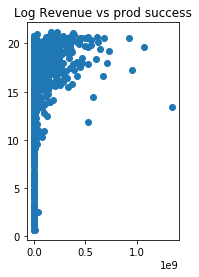

In [748]:
trainpre['log_revenue'] = np.log1p(trainpre['revenue'])
plt.subplot(1, 2, 1)
plt.scatter(trainpre['producer_success'], trainpre['log_revenue'])
plt.title('Log Revenue vs prod success');

In [850]:
trainpre['budget'] = train['budget']
ogTest = pd.read_csv('dsfinal/test.csv')
test['budget'] = ogTest['budget']

In [851]:
print("Train (zero vallues): " + str(trainpre.loc[trainpre.budget==0].shape))
print("Test (zero vallues): " + str(test.loc[test.budget==0].shape))

Train (zero vallues): (812, 17)
Test (zero vallues): (1211, 16)


In [852]:
def fixZeroAttempt(row):
    if row.budget == 0:
        if 'movie_results' in response.json().keys():
            if len(response.json()['movie_results']) >= 1:
                tmdbid = response.json()['movie_results'][0]['id']
            else:
                return 0
            responseTwo = requests.get('https://api.themoviedb.org/3/movie/' + str(tmdbid) + '?api_key=' +  api_key + '&language=en-US')
            if 'budget' in responseTwo.json().keys():
                newBudget = responseTwo.json()['budget']
            else:
                newBudget = 0
        else: 
            newBudget = 0
        return newBudget
    else:
        return row.budget


In [853]:
#trainpre.to_csv("dsfinal/budgetChangesBad.csv")

In [854]:
#newTrainBudget = trainpre.apply(lambda row: fixZeroAttempt(row), axis = 1)


trainpre['budget'] = newTrainBudget
trainpre['log_budget'] = np.log1p(trainpre['budget'])

#newTestBudget = test.apply(lambda row: fixZeroAttempt(row), axis = 1)

test['budget'] = newTestBudget
test['log_budget'] = np.log1p(test['budget'])

In [855]:
print("Train (zero values): " + str(trainpre.loc[trainpre.budget==0].shape))
print("Test (zero values): " + str(test.loc[test.budget==0].shape))

Train (zero values): (812, 17)
Test (zero values): (1211, 16)


In [749]:
test.head()

,id,budget,genres,imdb_id,popularity,release_date,runtime,revenue,has_collection,log_revenue,release_year,director_success,producer_success,actor1_success,actor2_success
0,3001,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",tt1226251,3.851534,7/14/2007,90.0,42538454,1,17.565919,2007,57596027.0,0.0,0.0,0.000000e+00
1,3002,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",tt0051380,3.559789,5/19/1958,65.0,480000,0,13.081543,1958,0.0,0.0,0.0,0.000000e+00
2,3003,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0118556,8.085194,5/23/1997,100.0,34673095,0,17.361475,1997,0.0,0.0,81209911.6,1.598942e+08
3,3004,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",tt1255953,8.596012,9/4/2010,130.0,0,0,0.000000,2010,68928304.0,6581915.0,0.0,0.000000e+00
4,3005,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",tt0418753,3.217680,2/11/2005,92.0,653621,0,13.390284,2005,742898.0,250000.0,3708505.0,0.000000e+00


In [856]:
trueResults = pd.DataFrame(columns=['id', 'revenue'])
trueResults['id'] = test['id']
trueResults['revenue'] = test['revenue']

In [857]:
trueResults.to_csv("dsFinal/trueResults.csv")

In [858]:
genreTrain = pd.read_csv('dsfinal/preptrain.csv')
genreTest = pd.read_csv('dsfinal/preptest.csv')

In [859]:
genre_cols = ['Drama', 'Adventure','Fantasy','Western','Thriller','Animation','Action','Mystery','Foreign','Science Fiction','Documentary','Family']
genreTest = genreTest[genre_cols]
genreTrain = genreTrain[genre_cols]
genreTrain.head()

,Drama,Adventure,Fantasy,Western,Thriller,Animation,Action,Mystery,Foreign,Science Fiction,Documentary,Family
0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0


AttributeError: ("'Series' object has no attribute 'budget'", 'occurred at index id')

In [860]:
finalTrainPre = trainpre.join(genreTrain)
finalTestPre = test.join(genreTest)

In [861]:
finalTestPre = finalTestPre.drop(['revenue', 'log_revenue','imdb_id', 'genres', 'release_date'], axis=1)
finalTrainPre = finalTrainPre.drop(['imdb_id', 'genres', 'release_date'], axis=1)


In [873]:
adjustedFromZero = finalTrainPre.quantile(.3)['budget']


In [883]:
finalTrainPre['adjusted_budget'] = finalTrainPre.apply(lambda row: adjustedFromZero if row.budget == 0 else row.budget, axis = 1)
finalTestPre['adjusted_budget'] = finalTestPre.apply(lambda row: adjustedFromZero if row.budget == 0 else row.budget, axis = 1)


In [884]:
finalTestPre['adjusted_budget']

0         480672.1
1          88000.0
2         480672.1
3        6800000.0
4        2000000.0
           ...    
4393    42000000.0
4394    19000000.0
4395    16000000.0
4396     2000000.0
4397       64000.0
Name: adjusted_budget, Length: 4398, dtype: float64

In [889]:
finalTestPre.to_csv("dsfinal/testPrepDone.csv")

In [890]:
finalTrainPre.to_csv("dsfinal/testPrepDone.csv")